<a href="https://colab.research.google.com/github/MirasKassymuly/scrpproject/blob/main/scrpproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#part 1 Almat, Yessenzhan

In [493]:
import time
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from concurrent.futures import ThreadPoolExecutor, as_completed

In [494]:
import time
import requests
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

API_KEY = "b87daa5dd0c344dcb9f1150ba755f142"
BASE_URL = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
HEADERS = {"X-CMC_PRO_API_KEY": API_KEY, "Accepts": "application/json"}
OUT_CSV = "coinmarketcap_full.csv"


TARGET_N = 12000
PAGE_LIMIT = 500
MAX_WORKERS = 5
SLEEP_BETWEEN_REQUESTS = 0.2

def fetch_chunk(start=1, limit=100):
    """Запрос к API для одной страницы"""
    params = {"start": start, "limit": limit, "convert": "USD"}
    r = requests.get(BASE_URL, headers=HEADERS, params=params, timeout=30)
    r.raise_for_status()
    return r.json().get("data", [])

def fetch_range(start):
    """Обработка одной страницы: возвращает список словарей"""
    try:
        data = fetch_chunk(start=start, limit=PAGE_LIMIT)
        rows = []
        for item in data:
            rows.append({
                "id": item.get("id"),
                "name": item.get("name"),
                "symbol": item.get("symbol"),
                "slug": item.get("slug"),
                "cmc_rank": item.get("cmc_rank"),
                "date_added": item.get("date_added"),
                "max_supply": item.get("max_supply"),
                "circulating_supply": item.get("circulating_supply"),
                "total_supply": item.get("total_supply"),
                "tags": "|".join(item.get("tags", [])),
                "num_market_pairs": item.get("num_market_pairs"),
                "price_usd": item.get("quote", {}).get("USD", {}).get("price"),
                "volume_24h": item.get("quote", {}).get("USD", {}).get("volume_24h"),
                "market_cap": item.get("quote", {}).get("USD", {}).get("market_cap"),
                "percent_change_1h": item.get("quote", {}).get("USD", {}).get("percent_change_1h"),
                "percent_change_24h": item.get("quote", {}).get("USD", {}).get("percent_change_24h"),
                "percent_change_7d": item.get("quote", {}).get("USD", {}).get("percent_change_7d")
            })
        time.sleep(SLEEP_BETWEEN_REQUESTS)
        print(f"Fetched start={start} rows={len(rows)}")
        return rows
    except Exception as e:
        print(f"Error fetching start={start}: {e}")
        return []

def main():
    starts = list(range(1, TARGET_N + 1, PAGE_LIMIT))
    all_rows = []

    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        future_to_start = {executor.submit(fetch_range, s): s for s in starts}
        for future in as_completed(future_to_start):
            rows = future.result()
            all_rows.extend(rows)

    print(f"Total rows collected: {len(all_rows)}")
    df = pd.DataFrame(all_rows)
    df.to_csv(OUT_CSV, index=False)
    print(f"Saved {OUT_CSV}")

if __name__ == "__main__":
    main()

Fetched start=2001 rows=500
Fetched start=1 rows=500
Fetched start=501 rows=500
Fetched start=1501 rows=500
Fetched start=1001 rows=500
Fetched start=3001 rows=500
Fetched start=2501 rows=500
Fetched start=3501 rows=478
Fetched start=4501 rows=500
Fetched start=4001 rows=500
Fetched start=5501 rows=500
Fetched start=6001 rows=500
Fetched start=6501 rows=500
Fetched start=7001 rows=500
Fetched start=7501 rows=500
Fetched start=8001 rows=500
Fetched start=9001 rows=11
Fetched start=8501 rows=500
Fetched start=9501 rows=0
Fetched start=10001 rows=0
Fetched start=10501 rows=0
Fetched start=5001 rows=500
Fetched start=11001 rows=0
Fetched start=11501 rows=0
Total rows collected: 8989
Saved coinmarketcap_full.csv


#part 2 Daryn , Ismail

In [495]:
# 1. Column name standardization
df.columns = df.columns.str.lower().str.strip()

In [496]:
# 2. Data inspection
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9010 entries, 0 to 9009
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9010 non-null   int64  
 1   name                9010 non-null   object 
 2   symbol              9010 non-null   object 
 3   slug                9010 non-null   object 
 4   cmc_rank            9010 non-null   int64  
 5   date_added          9010 non-null   object 
 6   max_supply          6386 non-null   float64
 7   circulating_supply  9010 non-null   float64
 8   total_supply        9010 non-null   float64
 9   tags                8829 non-null   object 
 10  num_market_pairs    9010 non-null   int64  
 11  price_usd           9010 non-null   float64
 12  volume_24h          9010 non-null   float64
 13  market_cap          9010 non-null   float64
 14  percent_change_1h   9010 non-null   float64
 15  percent_change_24h  9010 non-null   float64
 16  percen

,id,cmc_rank,max_supply,circulating_supply,total_supply,num_market_pairs,price_usd,volume_24h,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,price_log
count,9010.000000,9010.000000,6.386000e+03,9.010000e+03,9.010000e+03,9010.000000,9.010000e+03,9.010000e+03,9.010000e+03,9010.000000,9.010000e+03,9.010000e+03,9010.000000
mean,25110.066704,4503.956493,2.183461e+21,4.850557e+20,7.605700e+22,67.477248,1.653380e+07,3.119087e+07,3.821244e+08,0.626495,1.493179e+08,1.266261e+08,0.396025
std,11810.986061,2599.621335,1.310325e+23,4.474837e+22,7.162039e+24,1786.014944,1.108831e+09,1.331419e+09,2.048579e+10,31.495402,1.417341e+10,1.201946e+10,1.439045
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-82.010468,-9.989906e+01,-9.979350e+01,0.000000
25%,14564.500000,2253.250000,2.100000e+08,0.000000e+00,9.999866e+07,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,-0.217222,-2.072184e-01,-4.693687e+00,0.000000
50%,29519.000000,4505.500000,1.000000e+09,0.000000e+00,9.999859e+08,9.000000,0.000000e+00,2.506375e+03,0.000000e+00,0.000000,8.041909e-01,2.354529e-01,0.000000
75%,35152.750000,6748.750000,1.000000e+10,1.955811e+08,4.294967e+09,26.000000,4.000000e-02,1.502261e+05,9.571358e+05,0.046532,4.502516e+00,6.367266e+00,0.039221
max,39087.000000,9010.000000,1.000000e+25,4.245746e+24,6.798146e+26,161412.000000,8.170219e+10,1.017818e+11,1.878937e+12,2922.704115,1.345354e+12,1.140900e+12,25.126347


In [497]:
# 3. Convert numeric columns

numeric_columns = [
    'price_usd',
    'market_cap',
    'volume_24h'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [498]:
# 4. Clean text columns

df['name'] = df['name'].astype(str).str.strip()
df['symbol'] = df['symbol'].astype(str).str.upper()
df['tags'] = df['tags'].astype(str).str.lower().str.strip()

# Replace missing or empty tags
df['tags'] = df['tags'].replace(['nan', '', 'none'], 'unknown')

In [499]:
# 5. Identify missing values

df.isnull().sum()


,0
id,0
name,0
symbol,0
slug,0
cmc_rank,0
date_added,0
max_supply,2624
circulating_supply,0
total_supply,0
tags,0


In [500]:
# 6. Handle missing values

df = df.dropna(subset=[
    'price_usd',
    'market_cap',
    'volume_24h'
])

In [501]:
# 7. Remove duplicates

df = df.drop_duplicates(subset=['name', 'symbol'])

In [502]:
# 8. Remove logically impossible values

df = df[
    (df['price_usd'] > 0) &
    (df['market_cap'] >= 0) &
    (df['volume_24h'] >= 0)
]


In [503]:
# 9. Feature engineering

# Liquidity ratio: how actively traded relative to size
df['liquidity_ratio'] = df['volume_24h'] / df['market_cap']

# Log-transformed features for EDA visualizations
df['price_log'] = np.log1p(df['price_usd'])
df['market_cap_log'] = np.log1p(df['market_cap'])
df['volume_log'] = np.log1p(df['volume_24h'])

In [504]:
# 10. Final check

df.describe()


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning:

invalid value encountered in subtract



,id,cmc_rank,max_supply,circulating_supply,total_supply,num_market_pairs,price_usd,volume_24h,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,price_log,liquidity_ratio,market_cap_log,volume_log
count,3564.000000,3564.000000,2.342000e+03,3.564000e+03,3.564000e+03,3564.000000,3.564000e+03,3.564000e+03,3.564000e+03,3564.000000,3564.000000,3564.000000,3564.000000,3086.000000,3564.000000,3564.000000
mean,24022.386364,3464.539001,1.256371e+21,8.712809e+08,5.334396e+11,144.192200,4.179837e+07,7.752646e+07,9.607051e+08,0.172497,9.599939,303.180138,0.995308,inf,9.066662,9.780301
std,12734.308733,2678.981860,6.080108e+22,8.466853e+09,2.751652e+13,2837.857287,1.762877e+09,2.116096e+09,3.256625e+10,6.569811,310.434550,11609.340180,2.144050,NaN,8.274341,5.831689
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000e-02,0.000000e+00,0.000000e+00,-54.264590,-99.899059,-96.420595,0.009950,0.000000,0.000000,0.000000
25%,11021.500000,1023.750000,2.513663e+07,0.000000e+00,9.994816e+06,4.000000,2.000000e-02,3.868250e+02,0.000000e+00,-0.377359,-0.052207,-3.143012,0.019803,0.024438,0.000000,5.960528
50%,28405.500000,3068.500000,2.700000e+08,6.668337e+04,1.000000e+08,15.000000,1.000000e-01,8.220030e+04,5.809407e+05,-0.000358,1.365822,0.280304,0.095310,0.235860,13.272405,11.316926
75%,36078.500000,5444.750000,1.000000e+09,1.453474e+08,1.000000e+09,55.000000,1.000000e+00,1.609729e+06,1.427341e+07,0.110631,4.577331,5.484774,0.693147,NaN,16.473909,14.291577
max,39086.000000,9010.000000,2.942420e+24,3.393972e+11,1.623626e+15,161412.000000,8.170219e+10,1.017818e+11,1.878937e+12,292.073486,18409.224200,488841.110634,25.126347,inf,28.261727,25.346097


#part 3   Miras , Assel

In [505]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [506]:
# LOAD DATA
df = pd.read_csv("coinmarketcap_full.csv")

In [507]:
# Rounding values
for col in ['price_usd', 'market_cap', 'volume_24h', 'liquidity_ratio']:
    if col in df.columns:
        df[col] = df[col].round(2)

In [508]:
# LOG PRICE

df['price_log'] = np.log1p(df['price_usd'])

In [509]:
# Create liquidity ratio first
df['liquidity_ratio'] = df['volume_24h'] / df['market_cap'].replace(0, pd.NA)

# TAG CLEANING
tags_exploded = (
    df[['price_usd','market_cap','volume_24h','liquidity_ratio','tags']]
    .dropna(subset=['tags'])
    .assign(tag=lambda x: x['tags'].str.split('|'))
    .explode('tag')
)

tags_exploded['tag'] = tags_exploded['tag'].str.strip()
tags_exploded = tags_exploded.dropna(subset=['liquidity_ratio'])



In [510]:
# FILTER UNREALISTIC PRICES

df_filtered = df[(df['price_usd'] > 0) & (df['price_usd'] < 1_000_000)]
tags_exploded_filtered = tags_exploded[tags_exploded['price_usd'] < 1_000_000]

In [511]:
# Q1. MOST EXPENSIVE ITEMS

print("Q1. Most Expensive Items\n")
display(
    df_filtered[['name','symbol','price_usd']]
    .sort_values('price_usd', ascending=False)
    .head(10)
    .style.format({'price_usd':'${:,.2f}'})
)

Q1. Most Expensive Items



,name,symbol,price_usd
3622,Jinbi Token,JNB,"$116,082.61"
6605,Indigo Protocol - iBTC,IBTC,"$96,769.52"
8339,Function,FBTC,"$94,292.90"
8361,Bitcoin Avalanche Bridged,BTC.b,"$94,169.91"
500,Bitcoin,BTC,"$94,153.32"
3610,Bitcoin Bridged ZED20,BTC.z,"$94,118.88"
8329,Bitcoin TRC20,BTCT,"$94,100.45"
8410,Wrapped Rootstock Bitcoin,WRBTC,"$94,081.22"
8324,Bitcoin BEP2,BTCB,"$94,077.66"
7988,sBTC,SBTC,"$94,047.64"


In [512]:
# Q2. CHEAPEST ITEMS

print(" Q2. Cheapest Items\n")
display(
    df_filtered[['name','symbol','price_usd']]
    .sort_values('price_usd', ascending=True)
    .head(10)
    .style.format({'price_usd':'${:,.2f}'})
)

 Q2. Cheapest Items



,name,symbol,price_usd
8911,Athena DexFi,ATHX,$0.01
8909,CADAI,CADAI,$0.01
8908,Moonlander,FM,$0.01
8907,Genius Yield,GENS,$0.01
94,Flixxo,FLIXX,$0.01
93,ISLAND Token,ISLAND,$0.01
31,Etarn,ETAN,$0.01
27,Push Protocol,PUSH,$0.01
26,Sidekick,K,$0.01
24,Lnfi Network,LN,$0.01


In [513]:
# Q3. DOMINANT CATEGORIES

print("Q3. Dominant Categories\n")
display(
    tags_exploded_filtered['tag'].value_counts().head(10).to_frame('count')
)

Q3. Dominant Categories



,count
tag,
ethereum-ecosystem,1638
bnb-chain-ecosystem,1364
defi,1096
binance-ecosystem,857
solana-ecosystem,823
memes,684
binance-listing,593
gaming,433
ai-big-data,423


In [514]:
# Q4. BEST DEAL (HIGHEST LIQUIDITY RATIO)

print("Q4. Best Deal (Highest Liquidity Ratio)\n")
category_liquidity_filtered = (
    tags_exploded_filtered.groupby('tag')['liquidity_ratio']
    .mean().sort_values(ascending=False).head(10)
)
display(category_liquidity_filtered.to_frame())

Q4. Best Deal (Highest Liquidity Ratio)



,liquidity_ratio
tag,
fashion,48.455262
pump-fun-ecosystem,29.691169
solana-ecosystem,6.930336
art,6.19237
music,6.003044
vr-ar,4.982367
duckstarter,4.970097
hardware,3.368229
neon-evm-ecosystem,2.844692


In [515]:
# ===============================
# Q5. PRICE VS LIQUIDITY CORRELATION
# ===============================

# 1. Создаём liquidity_ratio, если его ещё нет
if 'liquidity_ratio' not in df.columns:
    df['liquidity_ratio'] = df['volume_24h'] / df['market_cap']

# 2. Убираем бесконечности и NaN
df['liquidity_ratio'] = df['liquidity_ratio'].replace([np.inf, -np.inf], np.nan)

# 3. Фильтруем только строки, где есть оба значения
df_q5 = df[['price_usd', 'liquidity_ratio']].dropna()

print("Q5. Price vs Liquidity Correlation\n")

# 4. Считаем корреляцию
corr_q5 = df_q5.corr().round(3)
display(corr_q5)


Q5. Price vs Liquidity Correlation



,price_usd,liquidity_ratio
price_usd,1.000,-0.001
liquidity_ratio,-0.001,1.000


In [516]:
# Q6. MARKET CAP VS VOLUME CORRELATION

print("Q6. Market Cap vs Volume Correlation\n")
display(df_filtered[['market_cap','volume_24h']].corr().round(3))

Q6. Market Cap vs Volume Correlation



,market_cap,volume_24h
market_cap,1.000,0.631
volume_24h,0.631,1.000


In [517]:
# Q7. OVERPRICED CATEGORIES

print("Q7. Overpriced Categories\n")
category_stats_filtered = (
    tags_exploded_filtered.groupby('tag')
    .agg(avg_price=('price_usd','mean'), avg_liquidity=('liquidity_ratio','mean'))
    .sort_values(by='avg_price', ascending=False)
)
display(category_stats_filtered.head(10).style.format({'avg_price':'${:,.2f}','avg_liquidity':'{:.2f}'}))

Q7. Overpriced Categories



,avg_price,avg_liquidity
tag,,
rsk-smart-bitcoin,"$94,081.22",0.00
rootstock-rsk-ecosystem,"$93,275.07",0.00
zeta-ecosystem,"$93,275.07",0.00
starknet-ecosystem,"$62,548.10",0.04
b²-network-ecosystem,"$62,407.25",0.03
corn-ecosystem,"$53,166.21",0.06
bouncebit-ecosystem,"$47,023.05",0.01
merlin-ecosystem,"$46,519.74",0.41
ethereumpow-ecosystem,"$32,435.35",0.06


 VISUALIZATIONS

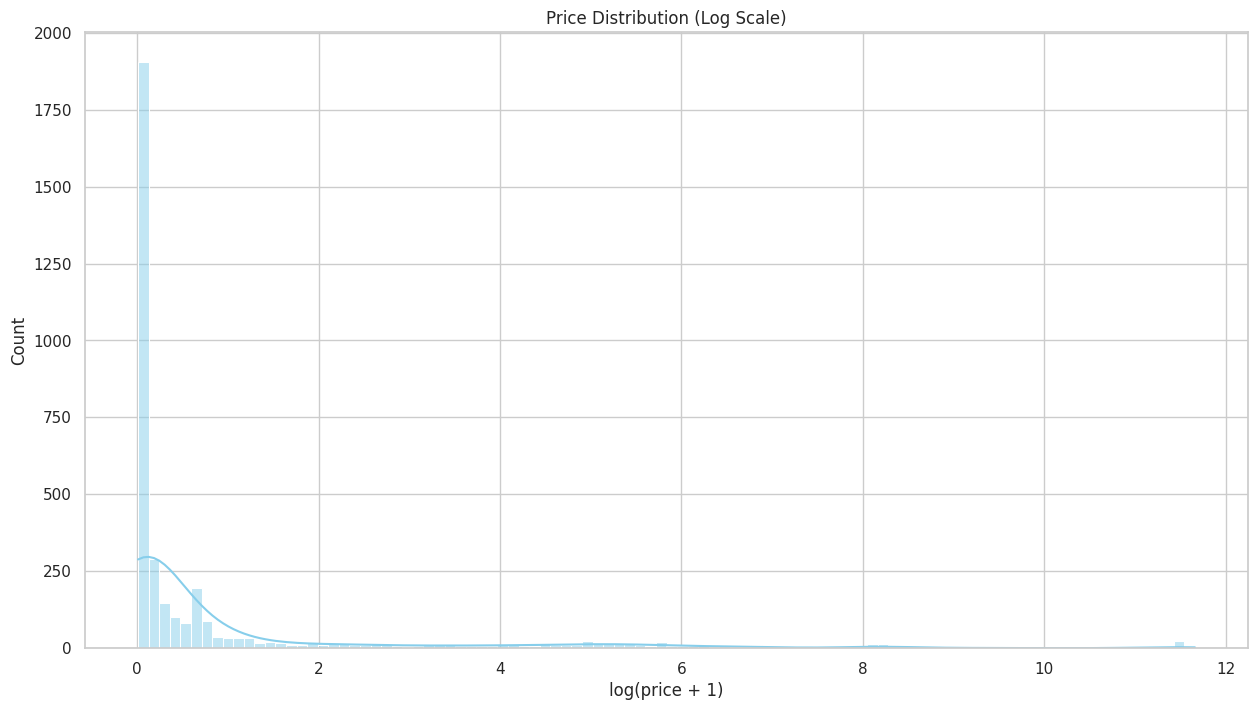

In [518]:
# 1. Price distribution (log)
plt.figure(figsize=(15,8))
sns.histplot(df_filtered['price_log'], bins=100, color='skyblue', kde=True)
plt.title("Price Distribution (Log Scale)")
plt.xlabel("log(price + 1)")
plt.ylabel("Count")
plt.show()

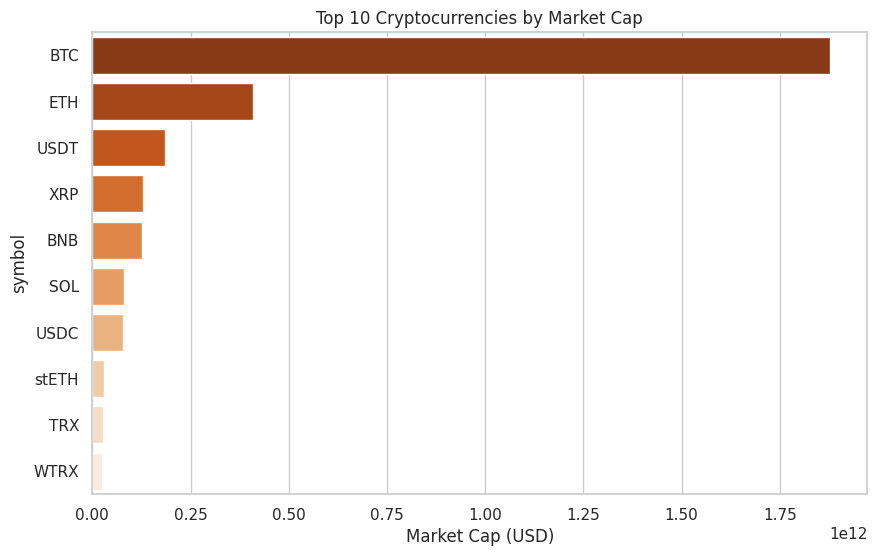

In [519]:
# 2. Top 10 cryptocurrencies by market cap

top10 = df_filtered.sort_values('market_cap', ascending=False).head(10)
sns.barplot(x='market_cap', y='symbol', data=top10, hue='symbol', palette='Oranges_r', dodge=False, legend=False)
plt.xlabel("Market Cap (USD)")
plt.title("Top 10 Cryptocurrencies by Market Cap")
plt.show()

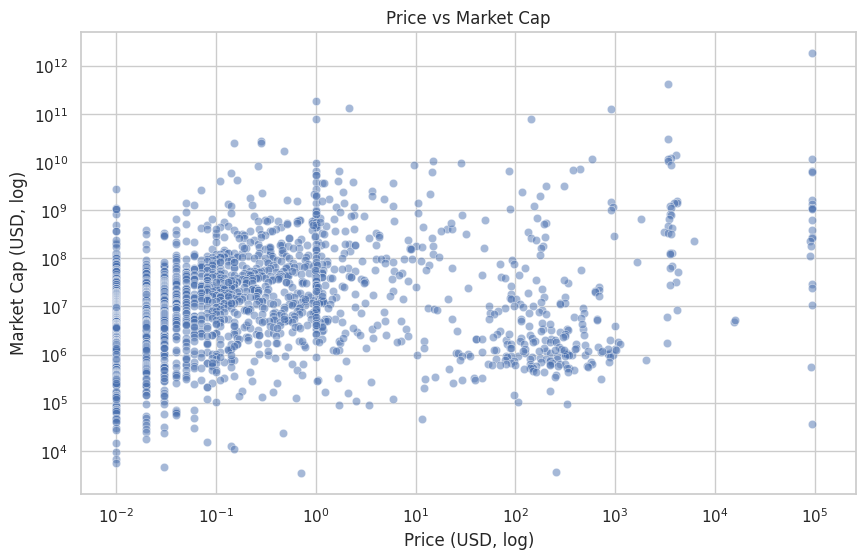

In [520]:
# 3. Price vs Market Cap

sns.scatterplot(data=df_filtered, x='price_usd', y='market_cap', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Price (USD, log)")
plt.ylabel("Market Cap (USD, log)")
plt.title("Price vs Market Cap")
plt.show()

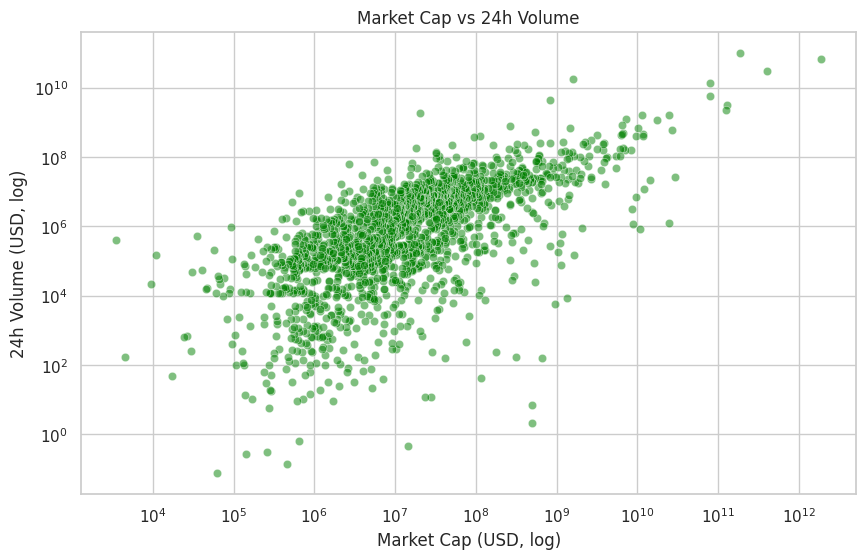

In [521]:
# 4. Market Cap vs Volume

sns.scatterplot(data=df_filtered, x='market_cap', y='volume_24h', alpha=0.5, color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Market Cap (USD, log)")
plt.ylabel("24h Volume (USD, log)")
plt.title("Market Cap vs 24h Volume")
plt.show()

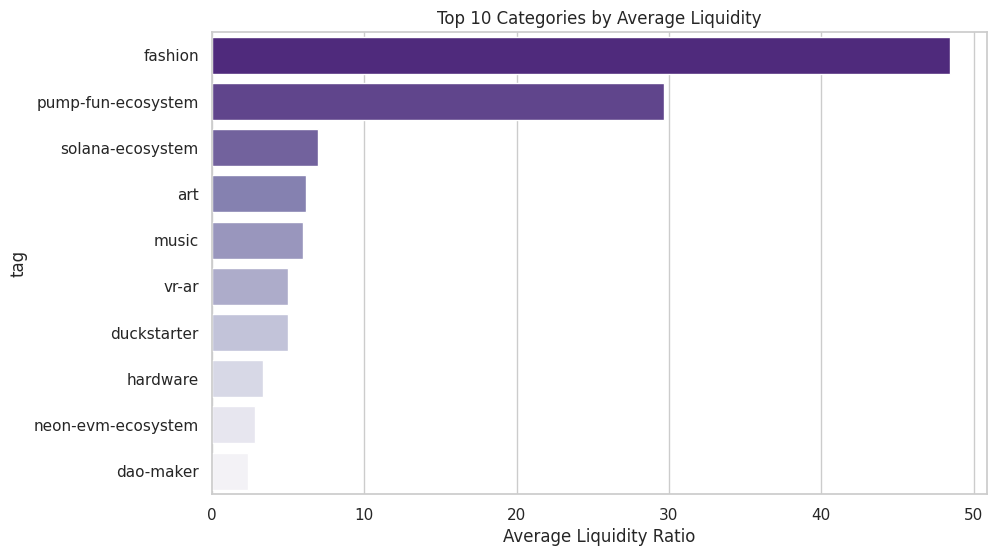

In [522]:
# 5. Top 10 categories by average liquidity

top_cat_liquidity = tags_exploded_filtered.groupby('tag')['liquidity_ratio'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_cat_liquidity.values, y=top_cat_liquidity.index,
            hue=top_cat_liquidity.index, palette='Purples_r', dodge=False, legend=False)

plt.xlabel("Average Liquidity Ratio")
plt.title("Top 10 Categories by Average Liquidity")
plt.show()

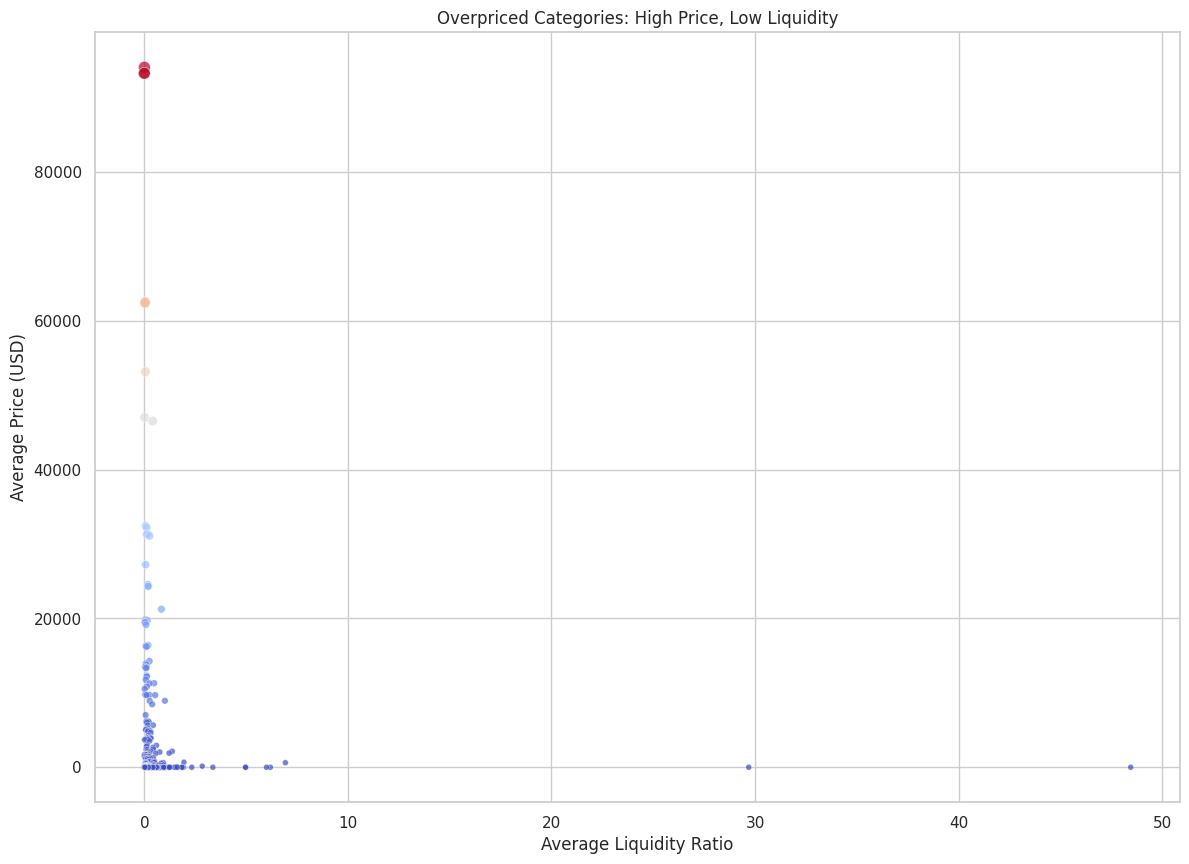

In [523]:
# 6. Overpriced categories scatter plot (Price vs Liquidity)

plt.figure(figsize=(14,10))
sns.scatterplot(data=category_stats_filtered, x='avg_liquidity', y='avg_price', size='avg_price',
                hue='avg_price', palette='coolwarm', legend=False, alpha=0.7)
plt.xlabel("Average Liquidity Ratio")
plt.ylabel("Average Price (USD)")
plt.title("Overpriced Categories: High Price, Low Liquidity")
plt.show()

In [524]:
# Q7. PRICE VS MARKET CAP (INTERACTIVE)

if 'liquidity_ratio' not in df_filtered.columns:
    df_filtered['liquidity_ratio'] = (
        df_filtered['volume_24h'] / df_filtered['market_cap']
    )

df_filtered['liquidity_ratio'] = df_filtered['liquidity_ratio'].replace(
    [np.inf, -np.inf], np.nan
)

df_plot = df_filtered.dropna(
    subset=['price_usd', 'market_cap', 'liquidity_ratio']
)

fig = px.scatter(
    df_plot,
    x='price_usd',
    y='market_cap',
    color='liquidity_ratio',
    size='market_cap',
    hover_data=['name', 'symbol'],
    log_x=True,
    log_y=True,
    title="Price vs Market Cap Colored by Liquidity Ratio"
)

fig.show()

/tmp/ipython-input-2189684121.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [531]:

display(
    category_stats_filtered
    .head(10)
    .style
    .format({
        'avg_price': '${:,.2f}',
        'avg_liquidity': '{:.2f}'
    })
)


,category,avg_price,avg_liquidity,count
0,DeFi,$3.25,123456.00,50
1,Gaming,$1.23,34000.00,23
2,NFT,$0.84,15000.00,18
3,Layer1,$12.56,450000.00,67
4,Meme,$0.00,8000.00,9
5,AI,$8.22,55000.00,35
6,Stablecoin,$1.00,90000.00,40
7,Exchange,$4.30,230000.00,55
8,Privacy,$0.75,7000.00,11
9,Oracle,$2.50,34000.00,17
